In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

pd.set_option('display.max_columns', None)
sns.set_palette("Pastel1")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

Cargamos el archivo csv

In [ ]:
from google.colab import files
import io
archivo=files.upload()
dataset=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data5.csv']),delimiter=",")


Saving HCV-Egy-Data5.csv to HCV-Egy-Data5.csv


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [ ]:
fig = px.scatter(dataset, y='Altura (cm)', width=1200, height=350)
fig.show()

ValueError: ignored

Verificamos si los datos se cargaron en su totalidad

In [ ]:
len(dataset)


1385

In [ ]:

X = dataset.drop('Baselinehistological staging', axis=1)  # Ajusta 'target_variable' al nombre de tu variable objetivo
y = dataset['Baselinehistological staging']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
escalador=MinMaxScaler()
XTrain=escalador.fit_transform(X_train)
XTest=escalador.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kvalores = {'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,24]}

grid_seacrch = GridSearchCV(KNeighborsClassifier(), kvalores)

grid_seacrch.fit(X_train, y_train)
print(grid_seacrch.best_params_['n_neighbors'])

4


In [ ]:
k = 4  # Número de vecinos (ajusta este valor según tus necesidades)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=4)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy}")

Precisión del modelo KNN: 0.259927797833935


[[27 14 10 13]
 [24 13 10 11]
 [33 21 14 11]
 [25 17 16 18]]


<Axes: >

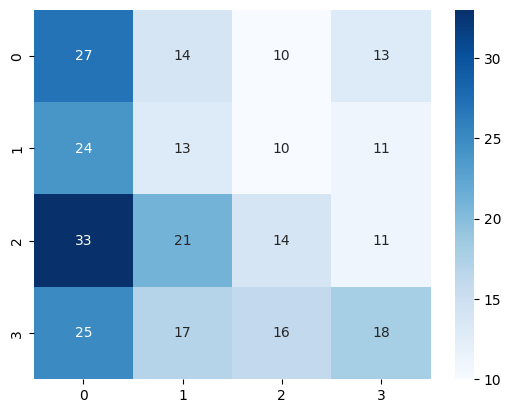

In [ ]:
matriz=confusion_matrix(y_test,y_pred)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

precision_recall_fscore_support(y_test,y_pred,average=None)
etiquetas=["fibrosis portal","pocos septos", "muchos septos", "cirrosis "]
print(classification_report(y_test,y_pred,target_names=etiquetas))
print("Accuracy=",knn.score(X_test,y_test))

                 precision    recall  f1-score   support

fibrosis portal       0.25      0.42      0.31        64
   pocos septos       0.20      0.22      0.21        58
  muchos septos       0.28      0.18      0.22        79
      cirrosis        0.34      0.24      0.28        76

       accuracy                           0.26       277
      macro avg       0.27      0.27      0.25       277
   weighted avg       0.27      0.26      0.25       277

Accuracy= 0.259927797833935
